<a href="https://colab.research.google.com/github/hongkuntian/comp551-applied-machine-learning/blob/master/project1/miniproject1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Data

Set URLs for datasets on github

In [0]:
iono_url = 'https://raw.githubusercontent.com/hongkuntian/comp551-applied-machine-learning/master/project1/data/ionosphere.data'
adult_url_data = 'https://raw.githubusercontent.com/hongkuntian/comp551-applied-machine-learning/master/project1/data/adult.data'
adult_url_test = 'https://raw.githubusercontent.com/hongkuntian/comp551-applied-machine-learning/master/project1/data/adult.test'

Define column names

In [0]:
iono_header = None
adult_header = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','class']

Import data

In [214]:
df_iono = pd.read_csv(iono_url, header=None)
temp_df = pd.get_dummies(df_iono[34])
temp_df
df_iono = temp_df.join(pd.get_dummies(temp_df.pop(34)))

df_adult_1 = pd.read_csv(adult_url_data, names=adult_header)
df_adult_2 = pd.read_csv(adult_url_test, comment='|', names=adult_header)
df_adult = pd.concat([df_adult_1, df_adult_2], axis=0).reset_index(drop=True)

dfs = [df_iono, df_adult]

KeyError: ignored

In [0]:
def select_rows(df,search_strings):
  df = df.select_dtypes(include=['object']).copy()
  unq,IDs = np.unique(df,return_inverse=True)
  unqIDs = np.searchsorted(unq,search_strings)
  return df[((IDs.reshape(df.shape) == unqIDs[:,None,None]).any(-1)).all(0)]

In [210]:
for df in dfs:
  print(df.shape)
  print('Number of missing values:', df.isnull().values.sum())
  print('Number or rows with ?', select_rows(df,['?']).sum())
  print((df[df.values  == '?']).values.sum())

(351, 35)
Number of missing values: 0
Number or rows with ? 34    bbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbb...
dtype: object
0
(48842, 15)
Number of missing values: 0
Number or rows with ? workclass         0.0
education         0.0
marital-status    0.0
occupation        0.0
relationship      0.0
race              0.0
sex               0.0
native-country    0.0
class             0.0
dtype: float64
0


In [0]:
df_adult.head(5)
df_adult.tail(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.
48841,35,Self-emp-inc,182148,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,60,United-States,>50K.


In [0]:
df_iono.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.51685,-0.97515,0.05499,-0.62237,0.33109,-1.00000,-0.13151,-0.45300,-0.18056,-0.35734,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,0.85443,0.00827,0.54591,0.00299,0.83775,-0.13644,0.75535,-0.08540,0.70887,-0.27502,0.43385,-0.12062,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,0.14516,0.54094,-0.39330,-1.00000,-0.54467,-0.69975,1.00000,0.00000,0.00000,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,0.34395,-0.27457,0.52940,-0.21780,0.45107,-0.17813,0.05982,-0.35575,0.02309,-0.52879,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [0]:
test = df_iono[1].unique()
print(test)

[0]


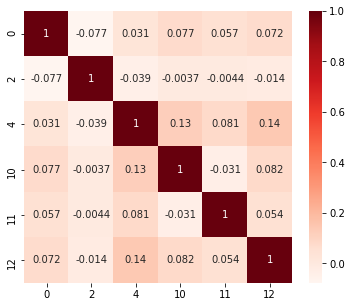

In [0]:
#Using Pearson Correlation (probably won't be able to use this :/)
plt.figure(figsize=(6,5))
cor = df_adult.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

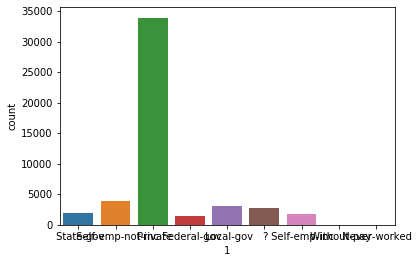

In [0]:
sns.countplot(x=1, data=df_adult)

# Models

# Analysis

# Testing grounds


In [0]:
print(df_iono.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 35 columns):
0     351 non-null int64
1     351 non-null int64
2     351 non-null float64
3     351 non-null float64
4     351 non-null float64
5     351 non-null float64
6     351 non-null float64
7     351 non-null float64
8     351 non-null float64
9     351 non-null float64
10    351 non-null float64
11    351 non-null float64
12    351 non-null float64
13    351 non-null float64
14    351 non-null float64
15    351 non-null float64
16    351 non-null float64
17    351 non-null float64
18    351 non-null float64
19    351 non-null float64
20    351 non-null float64
21    351 non-null float64
22    351 non-null float64
23    351 non-null float64
24    351 non-null float64
25    351 non-null float64
26    351 non-null float64
27    351 non-null float64
28    351 non-null float64
29    351 non-null float64
30    351 non-null float64
31    351 non-null float64
32    351 non-null float64
33    35

In [0]:
print(df_adult.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
age               48842 non-null object
workclass         48842 non-null int64
fnlwgt            48842 non-null object
education         48842 non-null int64
education-num     48842 non-null object
marital-status    48842 non-null object
occupation        48842 non-null object
relationship      48842 non-null object
race              48842 non-null object
sex               48842 non-null int64
capital-gain      48842 non-null int64
capital-loss      48842 non-null int64
hours-per-week    48842 non-null object
native-country    48842 non-null object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB
None


In [0]:
df_adult.boxplot('')